<a href="https://colab.research.google.com/github/Abelbimaw/KlasifikasiDR/blob/main/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PERSIAPAN**

In [ ]:
!pip install tensorflow==2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 3.0 MB 39.3 MB/s 
     |████████████████████████████████| 2.9 MB 58.7 MB/s 
     |████████████████████████████████| 454 kB 12.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [ ]:
import tensorflow as tf
from tensorflow import keras

#periksa versi library Tensorflow & Keras
print("Versi Tensorflow  :", tf.__version__)
print("Versi Keras       :", keras.__version__)

Versi Tensorflow  : 2.2.0
Versi Keras       : 2.3.0-tf


In [ ]:
!pip list --version

Package                       Version
----------------------------- ------------------------------
absl-py                       1.1.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.2
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.7.7
bokeh                         2.3.3
branca                        0.5.0
bs4                           0.0.1
CacheControl                  0.

#**1. PRAPROCSES DATASET**

######**1.1 LOAD DATA DARI GDRIVE**


In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


###### **1.2 UBAH DATA MENJADI ARRAY**

In [ ]:
import os
import cv2
import random
import numpy as np

img_size_150p = 128 # Actually dataset size (Untuk dipakai di Arsitektur CNN Custom)                              # ⚠️ SESUAIKAN ⚠️
img_size_224p = 224 # Increase dataset size (untuk dipakai di Arsitektur MobileNetV2)                             # ⚠️ SESUAIKAN ⚠️

path_train  = '/content/MyDrive/MyDrive/TA/Data TA Abel/Dataset/Data5/train'                            # ⚠️ SESUAIKAN ⚠️
path_test   = '/content/MyDrive/MyDrive/TA/Data TA Abel/Dataset/Data5/val'                              # ⚠️ SESUAIKAN ⚠️

categories  = ['No DR', 'Mild NPDR', 'Moderate NPDR', 'Severe NPDR', 'Proliferative DR'] 
def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category) # Ambil label sebagai index (number)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img)) 
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])
    
    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)

# Shuffle Data Train (kalo enggak di shuffle, nanti data train ngurut berdasarkan labels)
random.seed(10) # 10 sebagai index shuffle, agar saat run ulang nanti hasil shuffle sama
random.shuffle(dataTrain)

###### **1.3 GET FEATURES(X) & LABELS(Y)**


In [ ]:
# X untuk Features & y untuk labels
X_train, y_train, X_test, y_test = [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)


# -1 di reshape artinya membiarkan numpy menentukan dimensi data yang sesuai
X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_224p, img_size_224p, 3)
y_test  = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (3200, 224, 224, 3)
y_train : (3200,)
X_test  : (800, 224, 224, 3)
y_test  : (800,)


###### **1.4 FEATURES(X): NORMALIZATION**

In [ ]:
print("Isi Array X_train :\n\n", X_train[0]) # Ambil contoh data pertama
print("\nIsi Array X_test  :\n\n", X_test[0])

def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

X_train_norm, X_test_norm = prep_pixels(X_train, X_test)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])
print("\nIsi Array X_test_norm  :\n\n", X_test_norm[0])

Isi Array X_train :

 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

Isi Array X_test  :

 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

Isi Array X_train_norm :

 [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]


###### **1.5 LABELS(Y): ONE HOT ENCODING**


In [ ]:
from tensorflow.keras.utils import to_categorical

print("Isi Array y_train :", y_train)
print("Isi Array y_test  :", y_test)

# one hot encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)
print("\nIsi Array y_test_encode :\n\n", y_test_encode)

Isi Array y_train : [4 3 0 ... 2 0 3]
Isi Array y_test  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

###### **1.6 PLOT/TAMPILKAN DATASET**

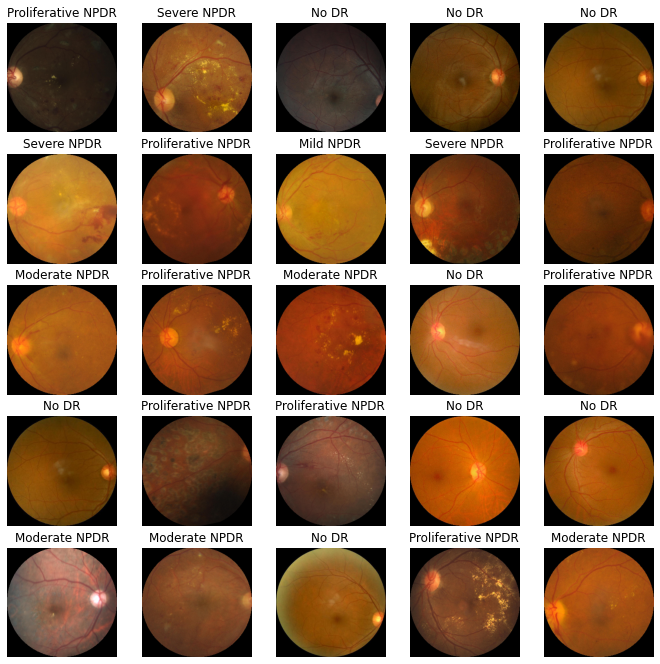

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5     # ⚠️ SESUAIKAN ⚠️
ncols = 5     # ⚠️ SESUAIKAN ⚠️
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))    
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j                 # Index looping
        ax[i,j].imshow(X_train[temp])    # Show features/images
        if y_train[temp] == 0:           # ⚠️ SESUAIKAN ⚠️
            judul = "No DR"              # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 1:         # ⚠️ SESUAIKAN ⚠️
            judul = "Mild NPDR"          # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 2:         # ⚠️ SESUAIKAN ⚠️
            judul = "Moderate NPDR"      # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 3:         # ⚠️ SESUAIKAN ⚠️
            judul = "Severe NPDR"        # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 4:         # ⚠️ SESUAIKAN ⚠️
            judul = "Proliferative NPDR" # ⚠️ SESUAIKAN ⚠️
        ax[i,j].set_title(judul)         # Show labels
        ax[i,j].axis('off')              # Hide axis
plt.show()

###### **1.6 BERSIHKAN USELESS DATA (RAM CLEANER)**

In [ ]:
import gc     # Gabage collector for cleaning deleted data from memory (in case : Clear list that are useless)

del dataTrain
del dataTest
del X_train
del X_test
#del y_train  # Dipakai nanti untuk confusion Matrix
#del y_test   # Dipakai nanti untuk confusion Matrix
#del y_inet   # Dipakai nanti untuk confusion Matrix

gc.collect()

77

###### **1.7 DATA FINAL YANG DIGUNAKAN**

In [ ]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)

X_train_norm     : (3200, 224, 224, 3)
y_train_encode   : (3200, 5)
X_test_norm      : (800, 224, 224, 3)
y_test_encode    : (800, 5)


# **ATUR INI TERLEBIH DAHULU**

In [ ]:
## Sesuiakan Parameter
from tensorflow.keras.optimizers import Adam, Nadam, Adamax, RMSprop, SGD
ler        = 0.001                                 # ⚠️ SESUAIKAN ⚠️
opt        = RMSprop(lr=ler)                           # ⚠️ SESUAIKAN ini yang diuji⚠️
epochs     = 100                                     # ⚠️ SESUAIKAN ⚠️
batch_size = 32                                   # ⚠️ SESUAIKAN ⚠️

# **2. RANCANG ARSITEKTUR**


###### **2.1 ARSITEKTUR MOBILENETV2**

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
________________

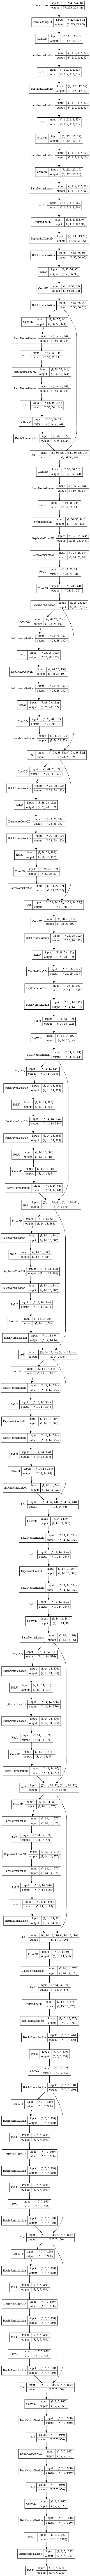

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model

'''
> weights='imagenet'            bobot diawal diisi langsung dengan bobotnya "cerdas"nya imagenet (pre-trained), jumlah epoch bisa sedikit
> weights=None                  bobot diawal diisi dengan nilai secara acak (random), jika menggunakan ini perbanyak jumlah epoch
> include_top=False             tidak mengikutsertakan fully-connected layer (karena akan didefinisikan secara terpisah dan menyesuaikan
                                dengan dataset yang dipakai), dengan kata lain yang diambil hanya feature extractor layernya saja
> conv_base.trainable=False     hanya diaktifkan jika weights='imagenet', artinya bobot di feature extractor tidak akan diperbarui saat
                                training (freeze), dengan kata lain "proses belajar" hanya akan dilakukan di fully-connected layer yang
                                telah didefinisikan sebelumnya secara terpisah. (feature extractor hanya tinggal dipakai saja)
'''

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size_224p, img_size_224p, 3)) # ⚠️ SESUAIKAN ⚠️
conv_base.trainable = False                                                                                   # ⚠️ SESUAIKAN ⚠️
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


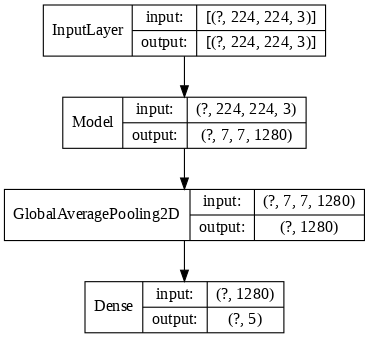

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

def define_model_mobilenetv2():
    model = Sequential()
    
    # 01-Feature Extractor Layer
    model.add(conv_base)                        # Feature Extractor pakai pre-trained model
    model.add(GlobalAveragePooling2D())
    
    # 02-Flatten Layer
    #model.add(Flatten())
    
    # 03-Fully Connected Layer
    #model.add(Dense(128, activation='relu'))    # ⚠️ SESUAIKAN ⚠️
    #model.add(Dropout(0.5, seed=10))            # ⚠️ SESUAIKAN ⚠️ (Coba pakai seed=0 atau 1,2,3,...)
    #model.add(Dense(64, activation='relu'))     # ⚠️ SESUAIKAN ⚠️
    # model.add(Dropout(0.5, seed=10))            # ⚠️ SESUAIKAN ⚠️ (Coba pakai seed=0 atau 1,2,3,...)
    model.add(Dense(5, activation='softmax'))   # ⚠️ SESUAIKAN ⚠️
    
    # Compile Model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # ⚠️ SESUAIKAN ⚠️
    return model

# Bersihkan model sebelumnya (keperluan re-training)
if "model" in globals(): # Check jika apakah variable model ada?
  del model
  gc.collect()

model = define_model_mobilenetv2()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

###### **2.2 ARSITEKTUR KUSTOM**

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 128)       204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)           

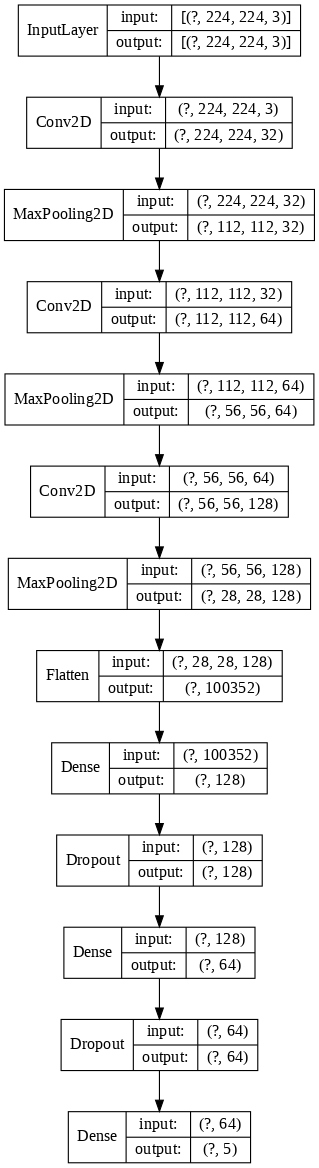

In [ ]:
# Referensi Arsitektur: https://www.tensorflow.org/tutorials/images/classification

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

def define_model_kustom():
    model = Sequential()

    # 01-Feature Extractor Layer
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(img_size_224p, img_size_224p, 3))) # ⚠️ Sesuaikan Input Shape
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 02-Flatten Layer
    model.add(Flatten())
    
    # 03-Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5, seed=10))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5, seed=10))
    model.add(Dense(5, activation='softmax'))
    
    # Compile Model
    opt = Adam(lr=0.0003)                                                  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_kustom()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80) # TB (Top Bottom) / LR (Left )

###### **2.3 MobileNetV2 + L1/L2**

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
________________

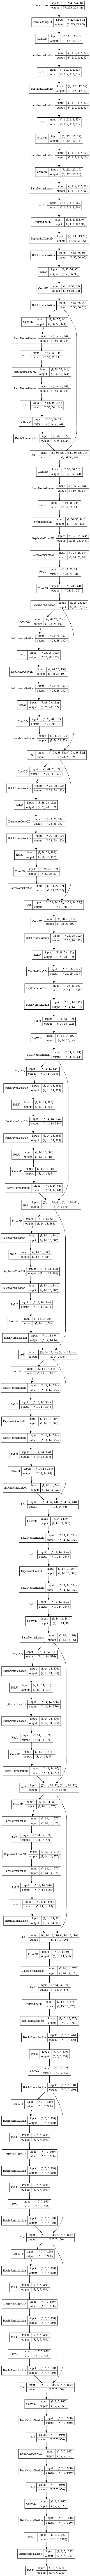

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model

'''
> weights='imagenet'            bobot diawal diisi langsung dengan bobotnya "cerdas"nya imagenet (pre-trained), jumlah epoch bisa sedikit
> weights=None                  bobot diawal diisi dengan nilai secara acak (random), jika menggunakan ini perbanyak jumlah epoch
> include_top=False             tidak mengikutsertakan fully-connected layer (karena akan didefinisikan secara terpisah dan menyesuaikan
                                dengan dataset yang dipakai), dengan kata lain yang diambil hanya feature extractor layernya saja
> conv_base.trainable=False     hanya diaktifkan jika weights='imagenet', artinya bobot di feature extractor tidak akan diperbarui saat
                                training (freeze), dengan kata lain "proses belajar" hanya akan dilakukan di fully-connected layer yang
                                telah didefinisikan sebelumnya secara terpisah. (feature extractor hanya tinggal dipakai saja)
'''

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size_224p, img_size_224p, 3)) # ⚠️ SESUAIKAN ⚠️
conv_base.trainable = False                                                                                   # ⚠️ SESUAIKAN ⚠️
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                81984     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 2,340,293
Trainable params: 82,309
Non-trainable params: 2,257,984
_________________________________________________________________


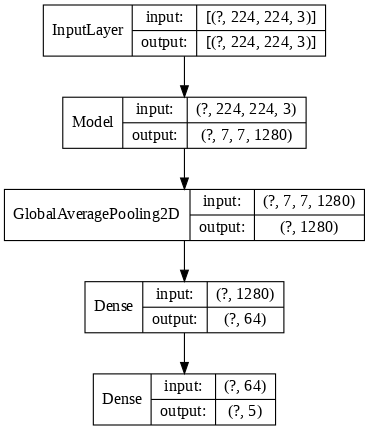

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

def define_model_mobilenetv2():
    model = Sequential()
    
    # 01-Feature Extractor Layer
    model.add(conv_base)                        # Feature Extractor pakai pre-trained model
    model.add(GlobalAveragePooling2D())
    
    # 02-Flatten Layer
    #model.add(Flatten())
    
    # 03-Fully Connected Layer
    #model.add(Dense(128, activation='relu'))    # ⚠️ SESUAIKAN ⚠️
    #model.add(Dropout(0.5, seed=10))            # ⚠️ SESUAIKAN ⚠️ (Coba pakai seed=0 atau 1,2,3,...)
    model.add(Dense(64, activation='relu'))     # ⚠️ SESUAIKAN ⚠️
    # model.add(Dropout(0.5, seed=10))            # ⚠️ SESUAIKAN ⚠️ (Coba pakai seed=0 atau 1,2,3,...)
    model.add(Dense(5, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.1)))   # ⚠️ SESUAIKAN ⚠️
    
    # Compile Model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # ⚠️ SESUAIKAN ⚠️
    return model

# Bersihkan model sebelumnya (keperluan re-training)
if "model" in globals(): # Check jika apakah variable model ada?
  del model
  gc.collect()

model = define_model_mobilenetv2()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

# **3A TRAINING DENGAN KFOLD**

###### **3.1 TRAINING UNTUK 5 FOLDS**

In [ ]:
path_save = '/content/MyDrive/MyDrive/TA/Data TA Abel/Result/Epoch/Percobaan 2/100_2022-07-06'

In [ ]:
os.mkdir(path_save) # Buat folder untuk menyimpan model (run 1x)

In [ ]:
pwd

'/content'

In [ ]:
%%time

import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

def evaluate_model(dataX, dataY, n_folds=5):  # ⚠️ SESUAIKAN ⚠️ (Hanya Data Train yang digunakan, nanti dipecah jadi Train & Validasi oleh library)

    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1) # ⚠️ SESUAIKAN ⚠️ (1 sebagai seed/index shuffle, agar saat run ulang nanti hasil shuffle sama)

    i = 0
    # enumerate splits
    for train_ix, val_ix in kfold.split(dataX):
        i = i+1
        # define model
        model = define_model_mobilenetv2()    # ⚠️ SESUAIKAN ⚠️
        # model = define_model_kustom()    # ⚠️ SESUAIKAN ⚠️
        # select rows for train and test
        trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX, valY), verbose=1)
        # evaluate model
        loss, acc = model.evaluate(valX, valY, verbose=0)
        print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))
        print('Loss Fold ke-' + str(i) + ' = %.3f' % (loss) + '\n')
        # append scores
        scores.append(acc)
        histories.append(history)

        #----------------------------- Additional -----------------------------#

        # 01 - Save model as h5
        model.save(path_save+"/model_fold_" + str(i) + ".h5")            # ⚠️ SESUAIKAN ⚠️    

        # 02 - Save model report to csv
        model_csv = pd.DataFrame(history.history)
        csv_file = path_save+"/model_fold_" + str(i) + ".csv"           # ⚠️ SESUAIKAN ⚠️
        with open(csv_file, mode="w") as f:
          model_csv.to_csv(f)
        
        # 03 - Clean the RAM for every Fold
        del trainX
        del trainY
        del valX
        del valY
        del model
        gc.collect()

        #----------------------------------------------------------------------#

    return scores, histories
    
scores, histories = evaluate_model(X_train_norm, y_train_encode)

Epoch 1/100
80/80 [==============================] - 5s 60ms/step - loss: 1.8818 - accuracy: 0.4664 - val_loss: 1.4871 - val_accuracy: 0.5719
Epoch 2/100
80/80 [==============================] - 4s 51ms/step - loss: 1.3808 - accuracy: 0.5879 - val_loss: 1.1676 - val_accuracy: 0.6672
Epoch 3/100
80/80 [==============================] - 4s 55ms/step - loss: 1.1460 - accuracy: 0.6449 - val_loss: 1.0734 - val_accuracy: 0.6687
Epoch 4/100
80/80 [==============================] - 4s 50ms/step - loss: 1.0082 - accuracy: 0.7023 - val_loss: 1.0087 - val_accuracy: 0.6828
Epoch 5/100
80/80 [==============================] - 4s 50ms/step - loss: 0.9292 - accuracy: 0.7297 - val_loss: 0.9111 - val_accuracy: 0.7219
Epoch 6/100
80/80 [==============================] - 4s 50ms/step - loss: 0.8565 - accuracy: 0.7516 - val_loss: 0.8494 - val_accuracy: 0.7672
Epoch 7/100
80/80 [==============================] - 4s 50ms/step - loss: 0.8043 - accuracy: 0.7789 - val_loss: 0.8167 - val_accuracy: 0.7688
Epoch 

###### **3.2 OPTION 1: PLOT GRAFIK HASIL TRAINING COMBINE**

In [ ]:
os.chdir(path_save)

In [ ]:
pwd

'/content/MyDrive/.shortcut-targets-by-id/1g_C84XbazN6VKRKJygtWF-YlEz4gzLZR/Data TA Abel/Result/Epoch/Percobaan 2/100_2022-07-06'

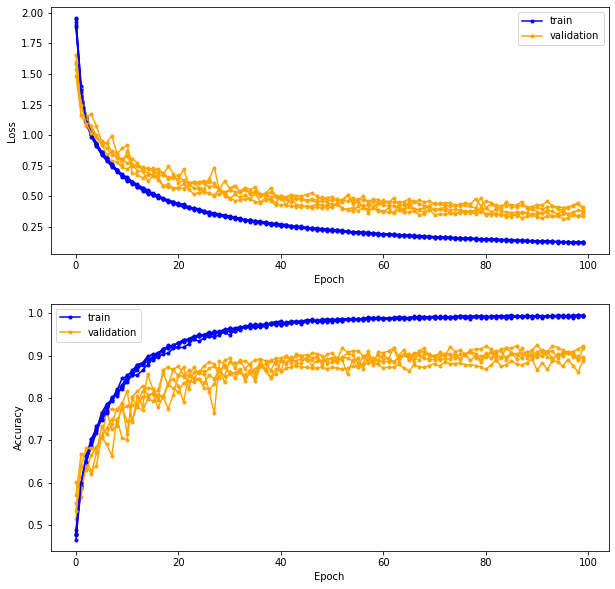

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories):
    plt.figure(figsize=(10,10))
    
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211) # 2 baris, 1 kolom, index ke-1
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')
        
        # plot accuracy
        plt.subplot(212) # 2 baris, 1 kolom, index ke-2
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
    plt.show()
summarize_diagnostics_combine(histories)

###### 3.2 OPTION 2: PLOT GRAFIK HASIL TRAINING SINGLE

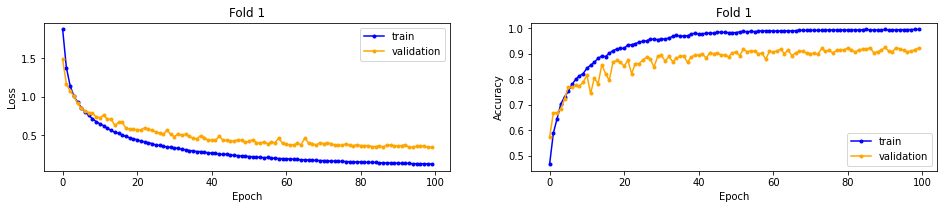

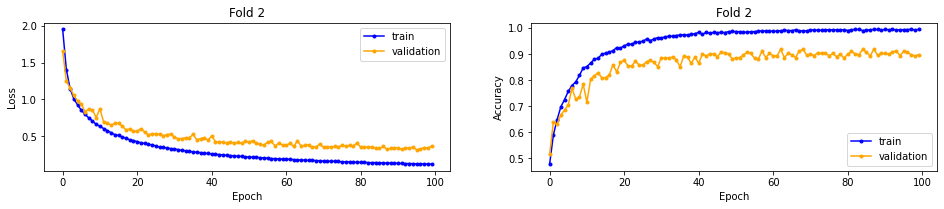

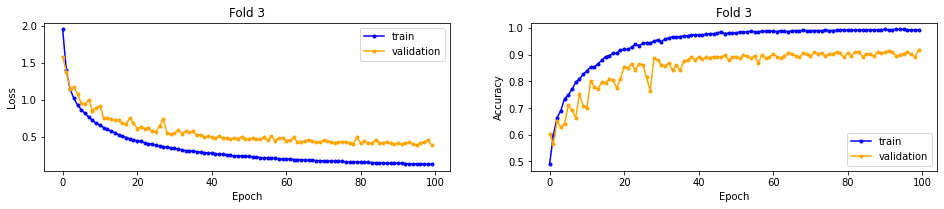

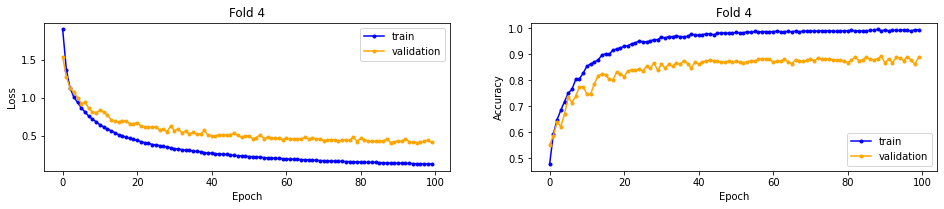

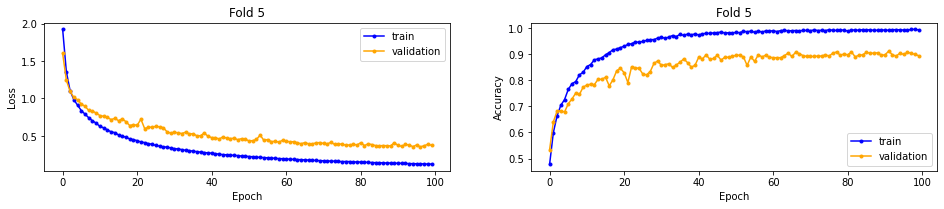

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.savefig(f"Loss_fold {i+1}.png")

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
        plt.savefig(f"Acc_fold {i+1}.png")
        plt.show()

summarize_diagnostics_single(histories)

###### 3.3 PLOT SKOR AKHIR (MEAN & STD)

Accuracy: mean=90.344 std=1.356, n=5


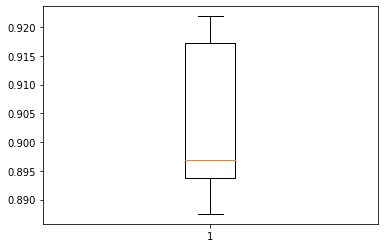

In [ ]:
from numpy import mean
from numpy import std

def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.savefig("Mean_Std.png")
    plt.show()

# summarize estimated performance
summarize_performance(scores)

# **3B. TRAINING TANPA K-FOLD**

In [ ]:
os.mkdir("/content/simpan_model2_tanpa") # Buat folder untuk save model report (run 1x)

In [ ]:
%%time

import pandas as pd

epochs = 10       # ⚠️ SESUAIKAN ⚠️
batch_size = 64   # ⚠️ SESUAIKAN ⚠️

model = define_model_mobilenetv2() 

#=======================================================================================================================================#
# CARA 1 : validation_split=0.2 ➜ artinya langsung memecah data train ➜ jadi 80% train & 20% validation ➜ memakan banyak sekali RAM
#          hal ini berarti pula bahwa penggunaan K-Fold itu memberatkan komputasi, coba saja sendiri, terlebih jika data berupa image
#          dan jumlah data hingga ribuan, hal ini akan memakan bayak sekali RAM, bahkan bisa hingga terjadi Out of Memory (OOM). Dan
#          karena alasan ini pula banyak sekali tutorial Image Classification dengan CNN yang tersebar di internet, tidak memakai
#          K-Fold. sebenarnya penggunaan K-Fold itu diperuntukan untuk Machine Learning, bukan Deep Learning, karena alasan komputasi.
#          sebagai alternatif solusinya yaitu gunakan saja pre-trained model terkenal, maka K-Fold tidak terlalu dibutuhkan, bahkan
#          jumlah epoch pun tidak harus banyak. dengan pre-trained model terkenal, meskipun dataset yang digunakan sedikit (misal
#          dibawah 1000), tetap berpotensi besar menghasilkan model yang optimal untuk kasus dataset yang digunakan. dan jika pada
#          saat testing menghasilkan akurasi yang baik, maka hal ini sudah membuktikan bahwa penggunaan K-Fold tidak terlalu dibutuhkan.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

#=======================================================================================================================================#
# CARA 2 : validation_data=(X_test_norm, y_test_encode) ➜ artinya gunakan data validasi dari luar/bukan dari data train yang dipecah
#          ➜ minim penggunaan RAM. CARA 2 ini sebagai alternatif solusi yang baik jika ingin training dengan validasi sekaligus.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_data=(X_test_norm, y_test_encode), epochs=20, batch_size=32, verbose=1)

#=======================================================================================================================================#
# CARA 3 : TANPA VALIDATION DATA. jika menggunakan CARA 2, malah menghasilkan lebih banyak salah prediksi saat testing data dari internet.
#          hal ini kemungkinan besar akibat terlalu serupanya data train dengan data validasi. Oleh karena itu, dalam kasus ini, karena
#          memang dataset yang sebenarnya hanya sedikit (banyak akibat di augmetasi saja), maka yang dilakukan hanyalah training dan
#          testing saja, tanpa melalui tahapan validasi. namun disamping itu, model yang dihasilkan sudah cukup baik. buktikan saja.
#=======================================================================================================================================#
history = model.fit(X_train_norm, y_train_encode, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
50/50 [==============================] - 8s 153ms/step - loss: 1.5222 - accuracy: 0.3428
Epoch 2/10
50/50 [==============================] - 8s 151ms/step - loss: 1.1991 - accuracy: 0.5231
Epoch 3/10
50/50 [==============================] - 8s 152ms/step - loss: 1.0747 - accuracy: 0.5756
Epoch 4/10
50/50 [==============================] - 8s 150ms/step - loss: 1.0026 - accuracy: 0.6078
Epoch 5/10
50/50 [==============================] - 8s 150ms/step - loss: 0.9520 - accuracy: 0.6259
Epoch 6/10
50/50 [==============================] - 8s 151ms/step - loss: 0.9133 - accuracy: 0.6475
Epoch 7/10
50/50 [==============================] - 8s 151ms/step - loss: 0.8845 - accuracy: 0.6575
Epoch 8/10
50/50 [==============================] - 8s 151ms/step - loss: 0.8546 - accuracy: 0.6787
Epoch 9/10
50/50 [==============================] - 8s 151ms/step - loss: 0.8315 - accuracy: 0.6884
Epoch 10/10
50/50 [==============================] - 8s 151ms/step - loss: 0.8130 - accuracy: 0.6963

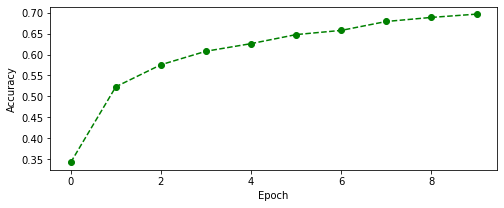

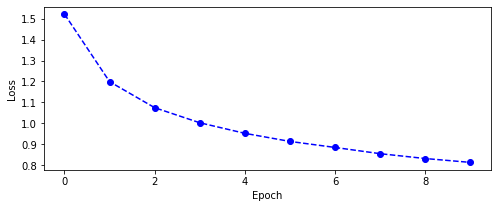

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
#ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
#ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# 01 - Save model as h5
model.save("/content/simpan_model2_tanpa/model_tanpa_kfold.h5")

# 02 - Save model report to csv
model_csv = pd.DataFrame(history.history)
csv_file = "/content/simpan_model2_tanpa/model_tanpa_kfold.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

# **4. TESTING MODEL (EVALUASI)**



### **PER FOLD**

#### **FOLD 1**

###### **4.1 LOAD MODEL YANG DIPILIH**

In [ ]:
# Bersihkan model sebelumnya (RAM cleaner)
if "model" in globals():
  del model
  gc.collect()

# Load model
from tensorflow.keras.models import load_model
# Masukkan path model yang dipilih
model = load_model( path_save+'/model_fold_1.h5') # ⚠️ SESUAIKAN ⚠️
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                81984     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 2,340,293
Trainable params: 82,309
Non-trainable params: 2,257,984
_________________________________________________________________


###### **4.2 OPTION 1: TESTING MODEL DENGAN DATA TEST LAPANGAN**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
if "encoder" in globals():
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # coba -> predict.shape -> (800, 5) -> maka axis=-1 itu akan ngambil nilai 5 tersebut (yaitu kategori/labelnya)

'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Label Prediksi   : [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 4 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 

###### **4.3 CONFUSION MATRIX & CLASSIFICATION REPORT {2}**

Accuracy : 91.250%
Loss     : 0.349

Classification Report :

                  precision    recall  f1-score   support

           No DR       0.95      0.93      0.94       160
            Mild       0.87      0.94      0.90       160
        Moderate       0.91      0.86      0.88       160
          Severe       0.97      0.90      0.93       160
Proliferative DR       0.88      0.93      0.90       160

        accuracy                           0.91       800
       macro avg       0.91      0.91      0.91       800
    weighted avg       0.91      0.91      0.91       800



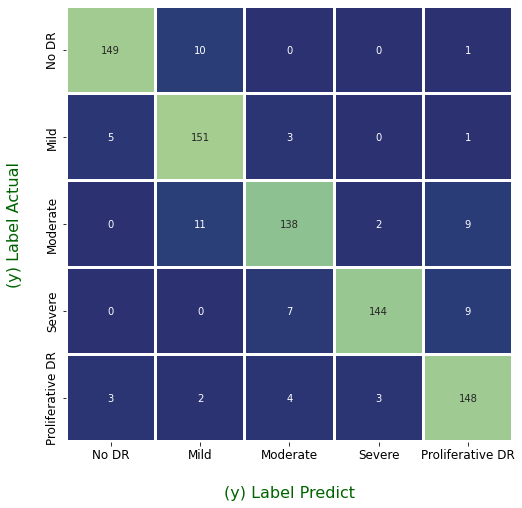

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']  # ⚠️ SESUAIKAN ⚠️
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

# ax.set_title('Mobilenet2 L2 | Fold 2\n| Adam 0.0003 | Epoch 50 \n| Batch size 64 | Lr 0.001', fontsize=18, pad=24)  # ⚠️ SESUAIKAN ⚠️ fontsize=14, pad=24)  # ⚠️ SESUAIKAN ⚠️
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Predict", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Actual", fontsize=16, color="darkgreen", labelpad=24)
plt.savefig("confusion_matrix1.png")
plt.show()

###### **4.4 ROC**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
class_labels = ['No DR','Mild', 'Moderate', 'Severe','Proliferative DR']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encode_new[:,i], pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_encode_new.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

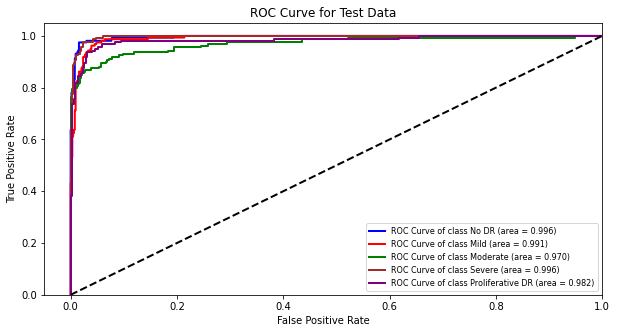

In [ ]:
colors = cycle(['blue', 'red', 'green', 'brown', 'purple'])
plt.figure(figsize=(10,5))
for i, color, lbl in zip(range(n_classes), colors, class_labels):
  plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc = 'lower right', prop = {'size': 8})
plt.savefig("Roc_curve1.jpg")
plt.show()

#### **FOLD 2**

###### **4.1 LOAD MODEL YANG DIPILIH**

In [ ]:
# Bersihkan model sebelumnya (RAM cleaner)
if "model" in globals():
  del model
  gc.collect()

# Load model
from tensorflow.keras.models import load_model
# Masukkan path model yang dipilih
model = load_model( path_save+'/model_fold_2.h5') # ⚠️ SESUAIKAN ⚠️
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                81984     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 2,340,293
Trainable params: 82,309
Non-trainable params: 2,257,984
_________________________________________________________________


###### **4.2 OPTION 1: TESTING MODEL DENGAN DATA TEST LAPANGAN**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
if "encoder" in globals():
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # coba -> predict.shape -> (800, 5) -> maka axis=-1 itu akan ngambil nilai 5 tersebut (yaitu kategori/labelnya)

'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Label Prediksi   : [0 0 0 0 0 0 0 1 1 0 4 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 4 2 1 1 1
 1 1 1 1 1 0 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 4 2 2 2 2 2 4 4 2 2 2 2 2 2 4 2 2
 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2
 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 3 4 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 4 2 2 2 2 1 2 2 1 2 2 3
 3 3 3

###### **4.3 CONFUSION MATRIX & CLASSIFICATION REPORT**

Accuracy : 90.875%
Loss     : 0.351

Classification Report :

                  precision    recall  f1-score   support

           No DR       0.96      0.93      0.95       160
            Mild       0.90      0.91      0.90       160
        Moderate       0.91      0.86      0.88       160
          Severe       0.98      0.88      0.93       160
Proliferative DR       0.82      0.96      0.89       160

        accuracy                           0.91       800
       macro avg       0.91      0.91      0.91       800
    weighted avg       0.91      0.91      0.91       800



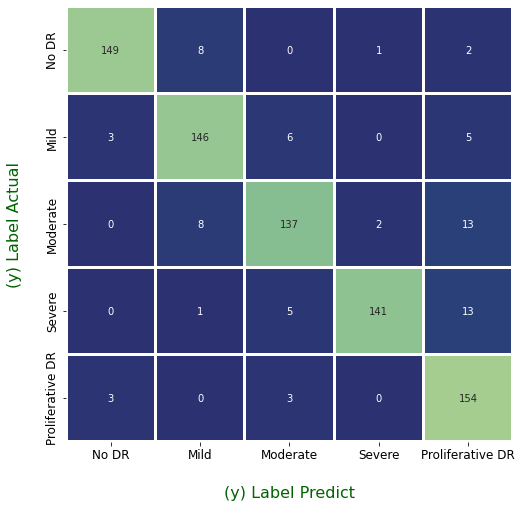

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']  # ⚠️ SESUAIKAN ⚠️
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

# ax.set_title('Mobilenet2 L2 | Fold 2\n| Adam 0.0003 | Epoch 50 \n| Batch size 64 | Lr 0.001', fontsize=18, pad=24)  # ⚠️ SESUAIKAN ⚠️ fontsize=14, pad=24)  # ⚠️ SESUAIKAN ⚠️
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Predict", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Actual", fontsize=16, color="darkgreen", labelpad=24)
plt.savefig("confusion_matrix2.png")
plt.show()

###### **4.4 ROC**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
class_labels = ['No DR','Mild', 'Moderate', 'Severe','Proliferative DR']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encode_new[:,i], pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_encode_new.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

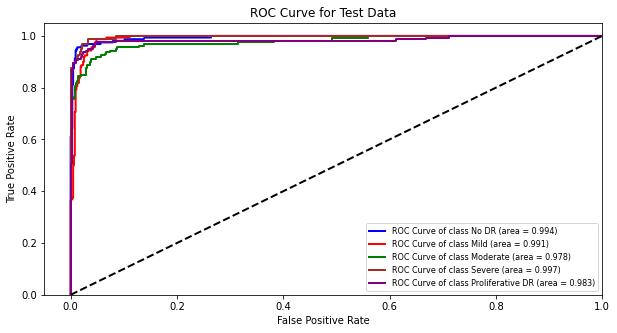

In [ ]:
colors = cycle(['blue', 'red', 'green', 'brown', 'purple'])
plt.figure(figsize=(10,5))
for i, color, lbl in zip(range(n_classes), colors, class_labels):
  plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc = 'lower right', prop = {'size': 8})
plt.savefig("Roc_curve2.jpg")
plt.show()

#### **FOLD 3**

###### **4.1 LOAD MODEL YANG DIPILIH**

In [ ]:
# Bersihkan model sebelumnya (RAM cleaner)
if "model" in globals():
  del model
  gc.collect()

# Load model
from tensorflow.keras.models import load_model
# Masukkan path model yang dipilih
model = load_model( path_save+'/model_fold_3.h5') # ⚠️ SESUAIKAN ⚠️
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                81984     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 325       
Total params: 2,340,293
Trainable params: 82,309
Non-trainable params: 2,257,984
_________________________________________________________________


###### **4.2 OPTION 1: TESTING MODEL DENGAN DATA TEST LAPANGAN**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
if "encoder" in globals():
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # coba -> predict.shape -> (800, 5) -> maka axis=-1 itu akan ngambil nilai 5 tersebut (yaitu kategori/labelnya)

'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Label Prediksi   : [0 0 0 0 0 0 0 1 1 0 4 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 2 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 4 2 2 2 2 1 2 1 2 2
 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 1 2 2 2 2 4 2 2 2 2 2 4 4 2 2 2 2 2 2 2 3 2
 2 2 3 2 2 2 2 4 4 2 2 2 2 2 2 2 2 1 1 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 3
 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0
 2 2 2 2 2 2 2 1 1 2 2 2 2 4 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 1 0 2 1 2 2 3
 3 3 3

###### **4.3 CONFUSION MATRIX & CLASSIFICATION REPORT {2}**

Accuracy : 91.250%
Loss     : 0.374

Classification Report :

                  precision    recall  f1-score   support

           No DR       0.95      0.93      0.94       160
            Mild       0.89      0.96      0.92       160
        Moderate       0.90      0.81      0.86       160
          Severe       0.93      0.94      0.93       160
Proliferative DR       0.90      0.93      0.91       160

        accuracy                           0.91       800
       macro avg       0.91      0.91      0.91       800
    weighted avg       0.91      0.91      0.91       800



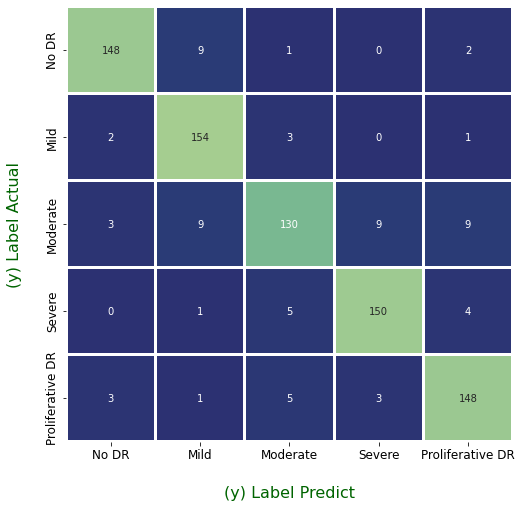

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']  # ⚠️ SESUAIKAN ⚠️
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

# ax.set_title('Mobilenet2 L2 | Fold 2\n| Adam 0.0003 | Epoch 50 \n| Batch size 64 | Lr 0.001', fontsize=18, pad=24)  # ⚠️ SESUAIKAN ⚠️ fontsize=14, pad=24)  # ⚠️ SESUAIKAN ⚠️
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Predict", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Actual", fontsize=16, color="darkgreen", labelpad=24)
plt.savefig("confusion_matrix3.png")
plt.show()

###### **4.4 ROC**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
class_labels = ['No DR','Mild', 'Moderate', 'Severe','Proliferative DR']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encode_new[:,i], pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_encode_new.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

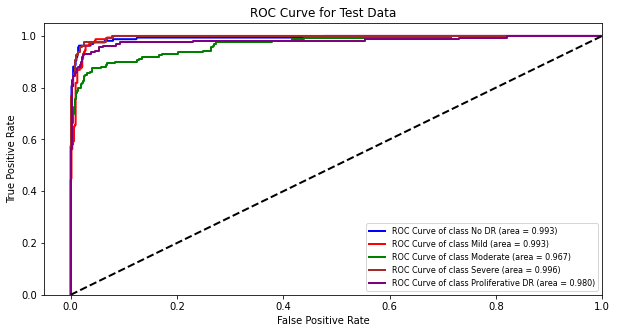

In [ ]:
colors = cycle(['blue', 'red', 'green', 'brown', 'purple'])
plt.figure(figsize=(10,5))
for i, color, lbl in zip(range(n_classes), colors, class_labels):
  plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc = 'lower right', prop = {'size': 8})
plt.savefig("Roc_curve3.jpg")
plt.show()

#### **FOLD 4**

###### **4.1 LOAD MODEL YANG DIPILIH**

In [ ]:
# Bersihkan model sebelumnya (RAM cleaner)
if "model" in globals():
  del model
  gc.collect()

# Load model
from tensorflow.keras.models import load_model
# Masukkan path model yang dipilih
model = load_model( path_save+'/model_fold_4.h5') # ⚠️ SESUAIKAN ⚠️
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                81984     
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 325       
Total params: 2,340,293
Trainable params: 82,309
Non-trainable params: 2,257,984
_________________________________________________________________


###### **4.2 OPTION 1: TESTING MODEL DENGAN DATA TEST LAPANGAN**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
if "encoder" in globals():
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # coba -> predict.shape -> (800, 5) -> maka axis=-1 itu akan ngambil nilai 5 tersebut (yaitu kategori/labelnya)

'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Label Prediksi   : [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 3 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 4 0 1 4 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 4 2
 2 1 1 2 2 4 2 2 2 2 2 1 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 2 2 2 2 2 2 3 2
 2 2 2 2 1 2 2 4 2 2 2 2 4 2 2 2 1 1 1 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 0 2 1 2 2 3
 3 3 3

###### **4.3 CONFUSION MATRIX & CLASSIFICATION REPORT**

Accuracy : 90.375%
Loss     : 0.376

Classification Report :

                  precision    recall  f1-score   support

           No DR       0.93      0.95      0.94       160
            Mild       0.87      0.93      0.89       160
        Moderate       0.94      0.82      0.88       160
          Severe       0.88      0.96      0.92       160
Proliferative DR       0.90      0.87      0.89       160

        accuracy                           0.90       800
       macro avg       0.91      0.90      0.90       800
    weighted avg       0.91      0.90      0.90       800



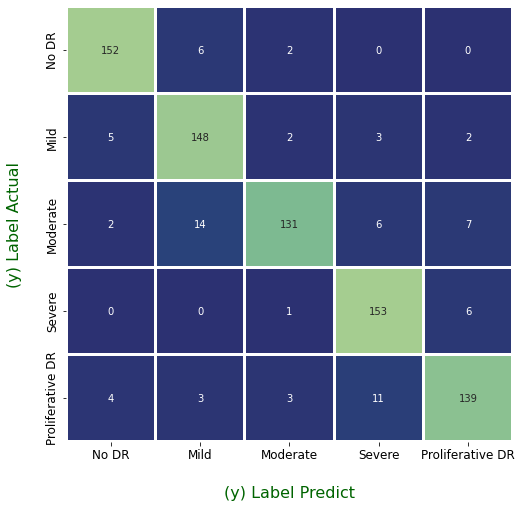

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']  # ⚠️ SESUAIKAN ⚠️
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

# ax.set_title('Mobilenet2 L2 | Fold 2\n| Adam 0.0003 | Epoch 50 \n| Batch size 64 | Lr 0.001', fontsize=18, pad=24)  # ⚠️ SESUAIKAN ⚠️ fontsize=14, pad=24)  # ⚠️ SESUAIKAN ⚠️
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Predict", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Actual", fontsize=16, color="darkgreen", labelpad=24)
plt.savefig("confusion_matrix4.png")
plt.show()

###### **4.4 ROC**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
class_labels = ['No DR','Mild', 'Moderate', 'Severe','Proliferative DR']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encode_new[:,i], pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_encode_new.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

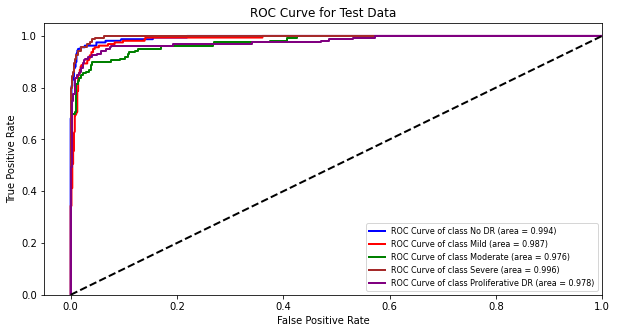

In [ ]:
colors = cycle(['blue', 'red', 'green', 'brown', 'purple'])
plt.figure(figsize=(10,5))
for i, color, lbl in zip(range(n_classes), colors, class_labels):
  plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc = 'lower right', prop = {'size': 8})
plt.savefig("Roc_curve4.jpg")
plt.show()

#### **FOLD 5**

###### **4.1 LOAD MODEL YANG DIPILIH**

In [ ]:
# Bersihkan model sebelumnya (RAM cleaner)
if "model" in globals():
  del model
  gc.collect()

# Load model
from tensorflow.keras.models import load_model
# Masukkan path model yang dipilih
model = load_model( path_save+'/model_fold_5.h5') # ⚠️ SESUAIKAN ⚠️
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                81984     
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 325       
Total params: 2,340,293
Trainable params: 82,309
Non-trainable params: 2,257,984
_________________________________________________________________


###### **4.2 OPTION 1: TESTING MODEL DENGAN DATA TEST LAPANGAN**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
if "encoder" in globals():
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # coba -> predict.shape -> (800, 5) -> maka axis=-1 itu akan ngambil nilai 5 tersebut (yaitu kategori/labelnya)

'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Label Prediksi   : [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 2 2 2 2 2 2 2 1 3 1 2 2
 2 2 0 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 3 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 3
 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 1 2 2 1 2 2 3
 3 3 3

###### **4.3 CONFUSION MATRIX & CLASSIFICATION REPORT {2}**

Accuracy : 90.750%
Loss     : 0.379

Classification Report :

                  precision    recall  f1-score   support

           No DR       0.95      0.97      0.96       160
            Mild       0.89      0.94      0.91       160
        Moderate       0.89      0.86      0.87       160
          Severe       0.86      0.97      0.91       160
Proliferative DR       0.96      0.80      0.87       160

        accuracy                           0.91       800
       macro avg       0.91      0.91      0.91       800
    weighted avg       0.91      0.91      0.91       800



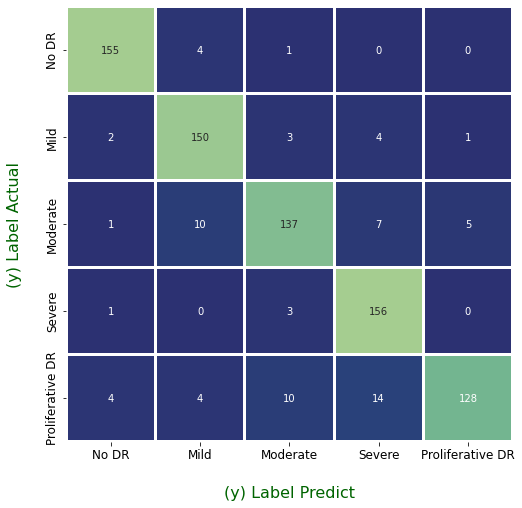

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']  # ⚠️ SESUAIKAN ⚠️
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

# ax.set_title('Mobilenet2 L2 | Fold 2\n| Adam 0.0003 | Epoch 50 \n| Batch size 64 | Lr 0.001', fontsize=18, pad=24)  # ⚠️ SESUAIKAN ⚠️ fontsize=14, pad=24)  # ⚠️ SESUAIKAN ⚠️
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Predict", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Actual", fontsize=16, color="darkgreen", labelpad=24)
plt.savefig("confusion_matrix5.png")
plt.show()

###### **4.4 ROC**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
class_labels = ['No DR','Mild', 'Moderate', 'Severe','Proliferative DR']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encode_new[:,i], pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_encode_new.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

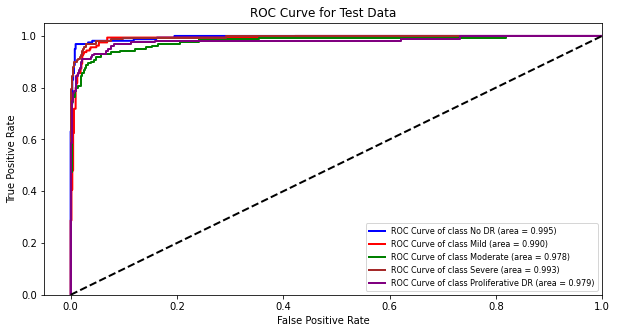

In [ ]:
colors = cycle(['blue', 'red', 'green', 'brown', 'purple'])
plt.figure(figsize=(10,5))
for i, color, lbl in zip(range(n_classes), colors, class_labels):
  plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc = 'lower right', prop = {'size': 8})
plt.savefig("Roc_curve5.jpg")
plt.show()

### **4.5 BACKUP MODEL PILIHAN KE GOOGLE DRIVE**

In [ ]:
import pandas as pd

# 01 - Save model as h5
model.save('cnn_original_adam_00003_fold_2.h5') # ⚠️ SESUAIKAN ⚠️

# 02 - Save model report to csv
# model_csv = pd.DataFrame(history.history)
# csv_file = "final_model.csv"
# with open(csv_file, mode="w") as f:
#   model_csv.to_csv(f)

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
!cp cnn_original_adam_00003_fold_2.h5 "/content/drive/MyDrive/TA-Abel Bima Wiratama/Code/Hasil_test/MobileNetV2-rev"
#!cp final_model.csv "drive/My Drive/"

#**5. TEST PER 1 IMAGE BARU**

###### **5.1 UPLOAD DATA BARU**

In [ ]:
# Cara 1 : Langsung pakai dari "/content/skripsi-cnn/test-from-internet" (data dari github) # ⚠️ YANG DIPAKAI DALAM KASUS INI ⚠️

In [ ]:
# Cara 2 : Upload data baru via local PC
from google.colab import files
uploaded = files.upload()

Saving aug_798.jpg to aug_798.jpg


In [ ]:
# Cara 3 : Upload data baru via download langsung dari internet
!wget -O 'data_test_baru.jpg' 'https://lumencms.blob.core.windows.net/media-generated/538/_L2A0849-ANSU-VANDA-Vanda-Terra-2-600-600.jpg'

###### **5.2 BUAT PREDIKSI**

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load and prepare the image
def load_image(filename):
    img = load_img(filename, target_size=(img_size_224p, img_size_224p))
    plt.imshow(img)
    plt.axis("off");
    img = img_to_array(img)
    img = img.reshape(-1, img_size_224p, img_size_224p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example(new_data_path):
    # load the image
    img = load_image(new_data_path)
    # load model
    model = load_model('/content/simpan_model_cnn/model_fold_2.h5')    # ⚠️ SESUAIKAN ⚠️
    # predict the class
    result = model.predict_classes(img)               # ⚠️ OPTION 1 ⚠️ (Hasilnya berbeda dengan OPTION 2, WHY?)
    #result = model.predict(img)                      # ⚠️ OPTION 2 ⚠️ (Hasilnya berbeda dengan OPTION 1, WHY?)
    if result[0] == 0:                                # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: No DR")              # ⚠️ SESUAIKAN ⚠️
    elif result[0] == 1:                              # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: Mild NPDR")          # ⚠️ SESUAIKAN ⚠️
    elif result[0] == 2:                              # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: Moderate NPDR")      # ⚠️ SESUAIKAN ⚠️
    elif result[0] == 3:                              # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: Severe NPDR")        # ⚠️ SESUAIKAN ⚠️
    elif result[0] == 4:                              # ⚠️ SESUAIKAN ⚠️
        print("\nHasil Prediksi: Proliferative DR")   # ⚠️ SESUAIKAN ⚠️


Hasil Prediksi: No DR


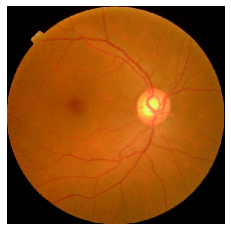

In [ ]:
new_data_path = "/content/aug_798.jpg" # ⚠️ SESUAIKAN ⚠️
run_example(new_data_path)